# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

RANDOM_STATE = 42

In [2]:
geo_data0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
geo_data0 = geo_data0.set_index('id')
geo_data1 = geo_data1.set_index('id')
geo_data2 = geo_data2.set_index('id')

In [4]:
def infohead(df):
    display(df.head())
    df.info()

In [5]:
def dataset_isdub_isnull(dataset):
    print('Количество явных дубликатов в датасете:', dataset.duplicated().sum())
    print('Количество пропусков в датасете:')
    print(dataset.isnull().sum())

In [6]:
infohead(geo_data0)
dataset_isdub_isnull(geo_data0)

,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647
iJLyR,-0.032172,0.139033,2.978566,168.620776
Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
Количество явных дубликатов в датасете: 0
Количество пропусков в датасете:
f0         0
f1         0
f2         0
product    0
dtype: int64


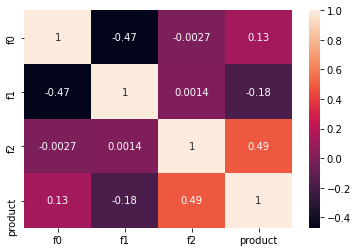

In [7]:
sns.heatmap(geo_data0[['f0', 'f1', 'f2', 'product']].corr(method='spearman'), annot = True);

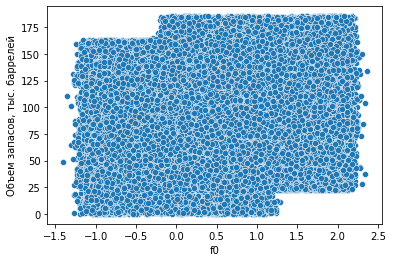

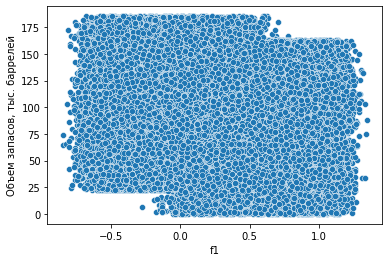

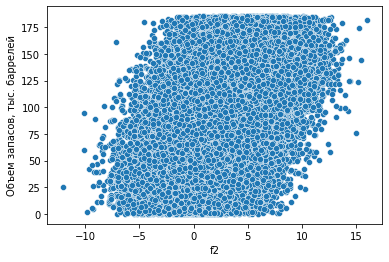

In [8]:
column_scatter = ['f0', 'f1', 'f2']
for i in column_scatter:
    sns.scatterplot(data = geo_data0, y = 'product', x = i)
    plt.ylabel('Объем запасов, тыс. баррелей')
    plt.xlabel(i)
    plt.show()

In [9]:
infohead(geo_data1)
dataset_isdub_isnull(geo_data1)

,f0,f1,f2,product
id,,,,
kBEdx,-15.001348,-8.276000,-0.005876,3.179103
62mP7,14.272088,-3.475083,0.999183,26.953261
vyE1P,6.263187,-5.948386,5.001160,134.766305
KcrkZ,-13.081196,-11.506057,4.999415,137.945408
AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, kBEdx to relB0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
Количество явных дубликатов в датасете: 0
Количество пропусков в датасете:
f0         0
f1         0
f2         0
product    0
dtype: int64


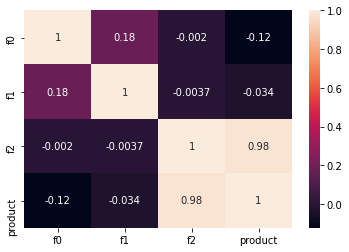

In [10]:
sns.heatmap(geo_data1[['f0', 'f1', 'f2', 'product']].corr(method='spearman'), annot = True);

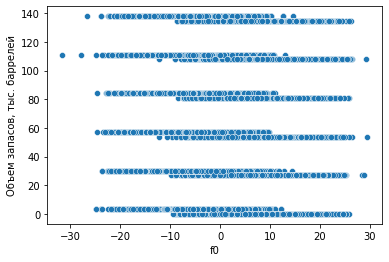

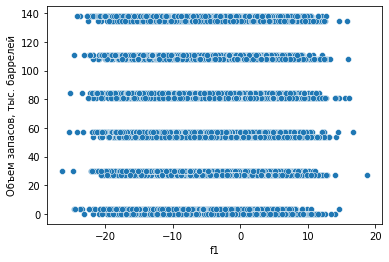

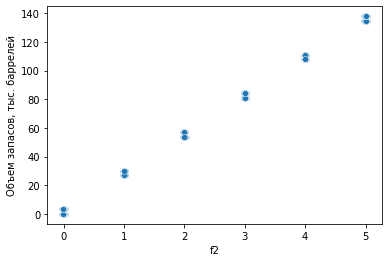

In [11]:
column_scatter = ['f0', 'f1', 'f2']
for i in column_scatter:
    sns.scatterplot(data = geo_data1, y = 'product', x = i)
    plt.ylabel('Объем запасов, тыс. баррелей')
    plt.xlabel(i)
    plt.show()

In [12]:
infohead(geo_data2)
dataset_isdub_isnull(geo_data2)

,f0,f1,f2,product
id,,,,
fwXo0,-1.146987,0.963328,-0.828965,27.758673
WJtFt,0.262778,0.269839,-2.530187,56.069697
ovLUW,0.194587,0.289035,-5.586433,62.871910
q6cA6,2.236060,-0.553760,0.930038,114.572842
WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, fwXo0 to V9kWn
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
Количество явных дубликатов в датасете: 0
Количество пропусков в датасете:
f0         0
f1         0
f2         0
product    0
dtype: int64


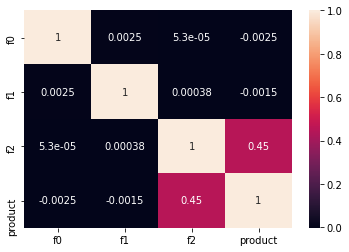

In [13]:
sns.heatmap(geo_data2[['f0', 'f1', 'f2', 'product']].corr(method='spearman'), annot = True);

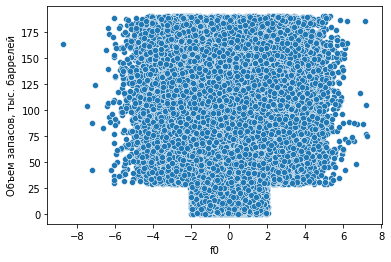

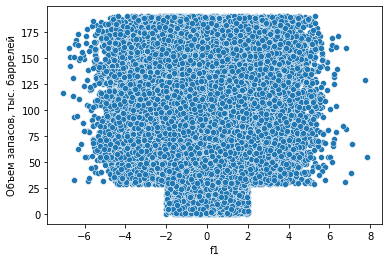

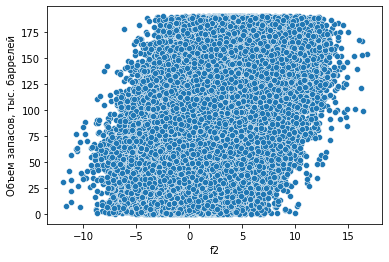

In [14]:
column_scatter = ['f0', 'f1', 'f2']
for i in column_scatter:
    sns.scatterplot(data = geo_data2, y = 'product', x = i)
    plt.ylabel('Объем запасов, тыс. баррелей')
    plt.xlabel(i)
    plt.show()

**Вывод:** на этом этапе была выполнена загрузка датасетов. Проверены на наличие дубликатов и пропусков, таковых не оказалось. Столбец id (уникальный идентификатор скважины) во всех датасетах был переведен в индексы.    
Датафреймы содержат следующую информацию:    
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);    
- product — объём запасов в скважине (тыс. баррелей)

В первом регионе geo_data1, отметим почти линейную зависимость product от признака f2, соотвественно от этого скорее всего и возникает хорошее качество линейной модели.

## Обучение и проверка модели

### Нулевой регион geo_data0

In [15]:
X_0 = geo_data0.drop('product', axis = 1)
y_0 = geo_data0['product']
X_0_train, X_0_valid, y_0_train, y_0_valid = train_test_split(
        X_0, 
        y_0, 
        test_size=0.25,
        random_state=RANDOM_STATE
)

In [16]:
scaler_0 = StandardScaler()
X_0_train_scaler = scaler_0.fit_transform(X_0_train)
X_0_valid_scaler = scaler_0.transform(X_0_valid)

In [17]:
model_0 = LinearRegression()
model_0.fit(X_0_train_scaler, y_0_train)
predict_0 = model_0.predict(X_0_valid_scaler)

In [18]:
mean_0 = predict_0.mean()
rmse_0 = mean_squared_error(y_0_valid, predict_0, squared=False)
print(f'Средний запас предсказанного сырья: {mean_0}, значение метрики RMSE: {rmse_0}')

Средний запас предсказанного сырья: 92.39879990657768, значение метрики RMSE: 37.75660035026169


### Первый регион geo_data1

In [19]:
X_1 = geo_data1.drop('product', axis = 1)
y_1 = geo_data1['product']
X_1_train, X_1_valid, y_1_train, y_1_valid = train_test_split(
        X_1, 
        y_1, 
        test_size=0.25,
        random_state=RANDOM_STATE
)

In [20]:
scaler_1 = StandardScaler()
X_1_train_scaler = scaler_1.fit_transform(X_1_train)
X_1_valid_scaler = scaler_1.transform(X_1_valid)

In [21]:
model_1 = LinearRegression()
model_1.fit(X_1_train_scaler, y_1_train)
predict_1 = model_1.predict(X_1_valid_scaler)

In [22]:
mean_1 = predict_1.mean()
rmse_1 = mean_squared_error(y_1_valid, predict_1, squared=False)
print(f'Средний запас предсказанного сырья: {mean_1}, значение метрики RMSE: {rmse_1}')

Средний запас предсказанного сырья: 68.7128780391376, значение метрики RMSE: 0.8902801001028846


### Второй регион geo_data2

In [23]:
X_2 = geo_data2.drop('product', axis = 1)
y_2 = geo_data2['product']
X_2_train, X_2_valid, y_2_train, y_2_valid = train_test_split(
        X_2, 
        y_2, 
        test_size=0.25,
        random_state=RANDOM_STATE
)

In [24]:
scaler_2 = StandardScaler()
X_2_train_scaler = scaler_2.fit_transform(X_2_train)
X_2_valid_scaler = scaler_2.transform(X_2_valid)

In [25]:
model_2 = LinearRegression()
model_2.fit(X_2_train_scaler, y_2_train)
predict_2 = model_2.predict(X_2_valid_scaler)

In [26]:
mean_2 = predict_2.mean()
rmse_2 = mean_squared_error(y_2_valid, predict_2, squared=False)
print(f'Средний запас предсказанного сырья: {mean_2}, значение метрики RMSE: {rmse_2}')

Средний запас предсказанного сырья: 94.77102387765939, значение метрики RMSE: 40.145872311342174


**Вывод:** В 0 и 2 регионе средние значение объема в месторождении примерно одинаковые, при этом модели имеют бОльшую погрешность. В 1 регионе средние запасы нефти в месторождениях ниже, но и погрешность модели значительно ниже.

## Подготовка к расчёту прибыли

In [27]:
#При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
n = 200
#Бюджет на разработку скважин в регионе — 10 млрд рублей.
budget = 10 * 10**9
#При нынешних ценах один баррель сырья приносит 450 рублей дохода.
#Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
revenue = 450000
#Сколько выделяется денег на одну скважину
budget_one = budget/n
#Посчитаем минимальное количество баррелей которые необходимы для разарботки одного месторождения
volume = budget_one / revenue
volume

111.11111111111111

Значит, если на месторождении объем сырья будет не меньше, чем 111.111, то никаких убытков не будет. Но если объем будет меньше, то затраты на бурение не окупятся. Средние запасы в каждом регионе меньше, чем данное число, а значит, либо в них есть 200 скважин с запасом больше чем 111, либо разработка будет убыточной.


<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безубыточной разработки посчитано верно, с выводом согласен  
</div>


## Расчёт прибыли и рисков 

In [28]:
def profit(data, y_true, y_predict):
    data['predict'] = y_predict
    data['true'] = y_true
    data = data.sort_values(by = 'predict', ascending = False)
    data = data.head(200)
    profite = data['true'].sum()*450000 - budget
    return profite

In [29]:
state = np.random.RandomState(12345)

### Нулевой регион geo_data0

In [30]:
prib_0 = []
for i in range(1000):
    subsample = X_0_valid.sample(n=500, replace = True, random_state=state)
    prib_0.append(profit(subsample, y_0_valid, pd.DataFrame(predict_0, index = X_0_valid.index)))

In [31]:
pd.Series(prib_0).mean() #Средняя прибыль нулевого региона

406278783.42441905

In [32]:
#Найдём 95% доверительный интервал
lower = pd.Series(prib_0).quantile(0.025)
upper = pd.Series(prib_0).quantile(0.975)
print(f'95%-доверительный интервал для нулевого региона от {lower} до {upper}')

95%-доверительный интервал для нулевого региона от -117742136.49486831 до 911737050.7514055


In [33]:
len([i for i in prib_0 if i<0])/len(prib_0)*100 #Доля отрицательных значений в нулевом регионе

6.7

### Первый регион geo_data1

In [34]:
prib_1 = []
for i in range(1000):
    subsample = X_1_valid.sample(n=500, replace = True, random_state=state)
    prib_1.append(profit(subsample, y_1_valid, pd.DataFrame(predict_1, index = X_1_valid.index)))

In [35]:
pd.Series(prib_1).mean()

441504277.5922549

In [36]:
lower = pd.Series(prib_1).quantile(0.025)
upper = pd.Series(prib_1).quantile(0.975)
print(f'95%-доверительный интервал для нулевого региона от {lower} до {upper}')

95%-доверительный интервал для нулевого региона от 35728489.280851334 до 828006639.0043902


In [37]:
len([i for i in prib_1 if i<0])/len(prib_1)*100

1.6

### Второй регион geo_data2

In [38]:
prib_2 = []
for i in range(1000):
    subsample = X_2_valid.sample(n=500, replace = True, random_state=state)
    prib_2.append(profit(subsample, y_2_valid, pd.DataFrame(predict_2, index = X_2_valid.index)))

In [39]:
pd.Series(prib_2).mean()

385213195.91415244

In [40]:
lower = pd.Series(prib_2).quantile(0.025)
upper = pd.Series(prib_2).quantile(0.975)
print(f'95%-доверительный интервал для нулевого региона от {lower} до {upper}')

95%-доверительный интервал для нулевого региона от -164785166.1090443 до 888206234.1976783


In [41]:
len([i for i in prib_2 if i<0])/len(prib_2)*100

7.8

**Вывод:** динственный регион с вероятностью убытков меньше 2.5 - это регион geo_data1. В доверительном интервале нет отрицательных значений, значит 95% значений - прибыль, а не убытки. Среднее значение прибыли в этом регионе - 441504277.5922549. Поэтому именно этот регион лучше всего подойдёт для разработки.